In [6]:
import os
import numpy as np 

simulation_name = "rine_5D_1000obs_bgtm_test_1"

run_ids = os.listdir(f"/Users/franciscocapunay/Downloads/gtm_server_copy/mlruns/{simulation_name}")
elbos={}
for run_id in run_ids:
    path = os.path.join(f"/Users/franciscocapunay/Downloads/gtm_server_copy/mlruns/{simulation_name}", run_id, "artifacts" , "gtm_bayes", "training")
    if os.path.exists(path)==False:
        continue
    npy_files = [f for f in os.listdir(path) if f.endswith('.npz')]
    elbo_values = np.load(os.path.join(path, npy_files[0]))['elbo']
    elbos[run_id] = elbo_values
    

/var/folders/_p/ttn2qcdj23jdpltyffhwq9pr0000gn/T/ipykernel_48784/2660543688.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


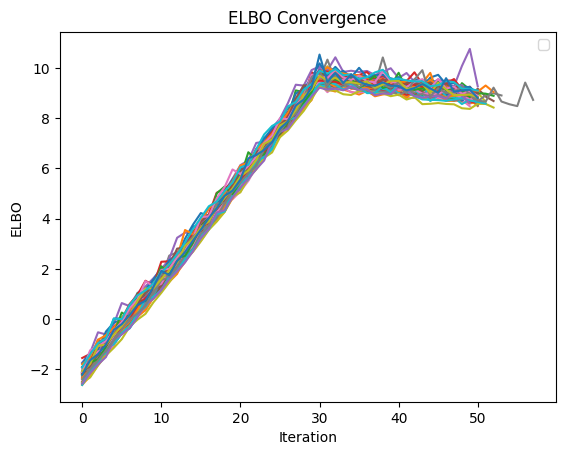

In [7]:
import matplotlib.pyplot as plt

plt.figure()
for _, v in elbos.items():
    plt.plot(v)

plt.xlabel("Iteration")
plt.ylabel("ELBO")
plt.title("ELBO Convergence")
plt.legend()
plt.show()

In [8]:
import mlflow
from mlflow.tracking import MlflowClient

client = MlflowClient()
hist = client.get_metric_history(run_id="0ec3d6a8ef4c46f3b3e4c3e5b4ad8c26", key="auc_iae_bgtm")

# hist is a list of Metric objects
for m in hist[-5:]:
    print(m.step, m.value, m.timestamp)

2026/01/14 19:36:38 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/14 19:36:38 INFO mlflow.store.db.utils: Updating database tables
2026/01/14 19:36:38 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/14 19:36:38 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/14 19:36:39 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/14 19:36:39 INFO alembic.runtime.migration: Will assume non-transactional DDL.
